In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle

In [2]:
import flux_recoil_spec as frs
import importlib

In [3]:
importlib.reload(frs)

E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=1e-3)

fast flux: 4000.0000000000005 n/m^2/day
175
6000 6000
LinregressResult(slope=-0.341989060170171, intercept=-12.883178144228603, rvalue=-0.9953352356165475, pvalue=2.847357267291413e-06, stderr=0.014824519476612728, intercept_stderr=0.06273875262265612)
0.009998654133395216 0.01


In [4]:
print(np.shape(E))

(13686,)


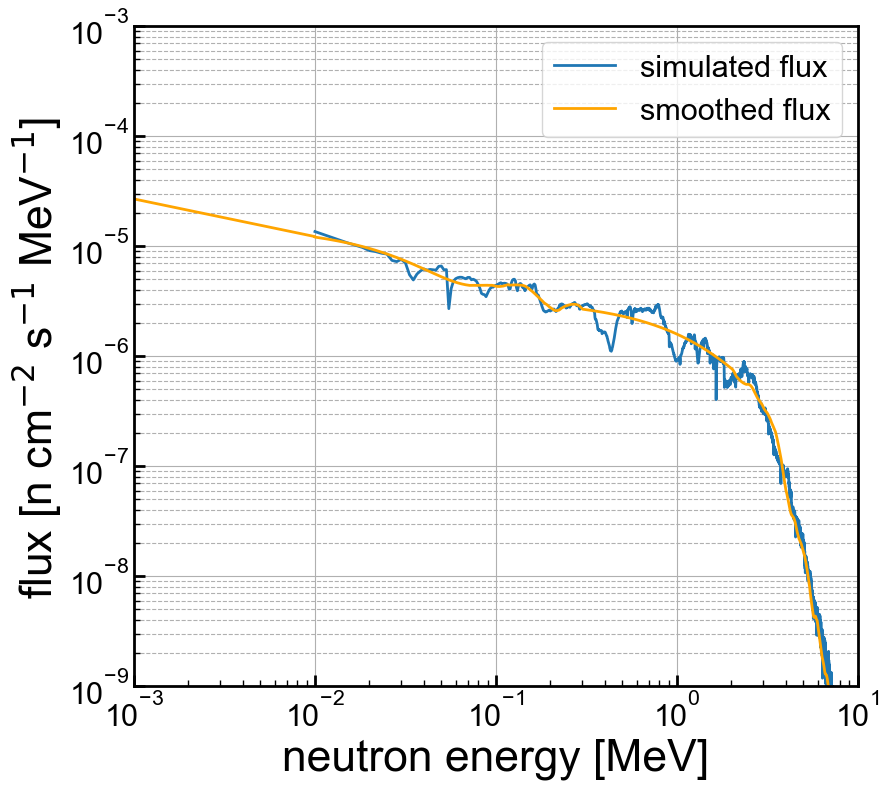

In [5]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


#print(estring)
ax1.plot(ff, ffspec,label='simulated flux')
ax1.plot(E, F,color='orange',label="smoothed flux")



ymin = 1e-9
ymax = 1e-3

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-3, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('flux [n cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/heflux_library.png')
#plt.savefig('../1-Paper_Figures/hist.pdf')
plt.show()

In [6]:
importlib.reload(frs)
print(frs.dRdEr(0.01,E,F))

0.000432078775177118


In [7]:
#timing
import time

start = time.time()
print(frs.dRdEr(0.01,E,F))
end = time.time()
print('Evaluation Time: {:1.5f} sec.'.format(end-start))

0.000432078775177118
Evaluation Time: 1.37271 sec.


In [8]:
start = time.time()
print(frs.dRdEr(0.01,E,F,N=10))
end = time.time()
print('Evaluation Time: {:1.5f} sec.'.format(end-start))

0.0003183600611864896
Evaluation Time: 12.61618 sec.


In [9]:
#get Er vector
Er= np.geomspace(100/1e6, 1e1, 100)
print(np.shape(Er))
print(Er)

(100,)
[1.00000000e-04 1.12332403e-04 1.26185688e-04 1.41747416e-04
 1.59228279e-04 1.78864953e-04 2.00923300e-04 2.25701972e-04
 2.53536449e-04 2.84803587e-04 3.19926714e-04 3.59381366e-04
 4.03701726e-04 4.53487851e-04 5.09413801e-04 5.72236766e-04
 6.42807312e-04 7.22080902e-04 8.11130831e-04 9.11162756e-04
 1.02353102e-03 1.14975700e-03 1.29154967e-03 1.45082878e-03
 1.62975083e-03 1.83073828e-03 2.05651231e-03 2.31012970e-03
 2.59502421e-03 2.91505306e-03 3.27454916e-03 3.67837977e-03
 4.13201240e-03 4.64158883e-03 5.21400829e-03 5.85702082e-03
 6.57933225e-03 7.39072203e-03 8.30217568e-03 9.32603347e-03
 1.04761575e-02 1.17681195e-02 1.32194115e-02 1.48496826e-02
 1.66810054e-02 1.87381742e-02 2.10490414e-02 2.36448941e-02
 2.65608778e-02 2.98364724e-02 3.35160265e-02 3.76493581e-02
 4.22924287e-02 4.75081016e-02 5.33669923e-02 5.99484250e-02
 6.73415066e-02 7.56463328e-02 8.49753436e-02 9.54548457e-02
 1.07226722e-01 1.20450354e-01 1.35304777e-01 1.51991108e-01
 1.70735265e-01 1

In [10]:
dRlow = np.zeros(np.shape(Er))
dRhigh = np.zeros(np.shape(Er))

In [11]:
for i,Erec in enumerate(Er):
    dRlow[i] = frs.dRdEr(Erec,E,F)

In [12]:
start = time.time()
for i,Erec in enumerate(Er):
    dRhigh[i] = frs.dRdEr(Erec,E,F,N=10)
end = time.time()
print('Evaluation Time: {:1.5f} sec.'.format(end-start))

Evaluation Time: 1115.93296 sec.


In [13]:
with open('recoil_data/ErVsdEr.txt', 'w') as f:
        for i,Erec in enumerate(Er):
            print('{}\t{}\t{}'.format(Erec,dRlow[i],dRhigh[i]),file=f)

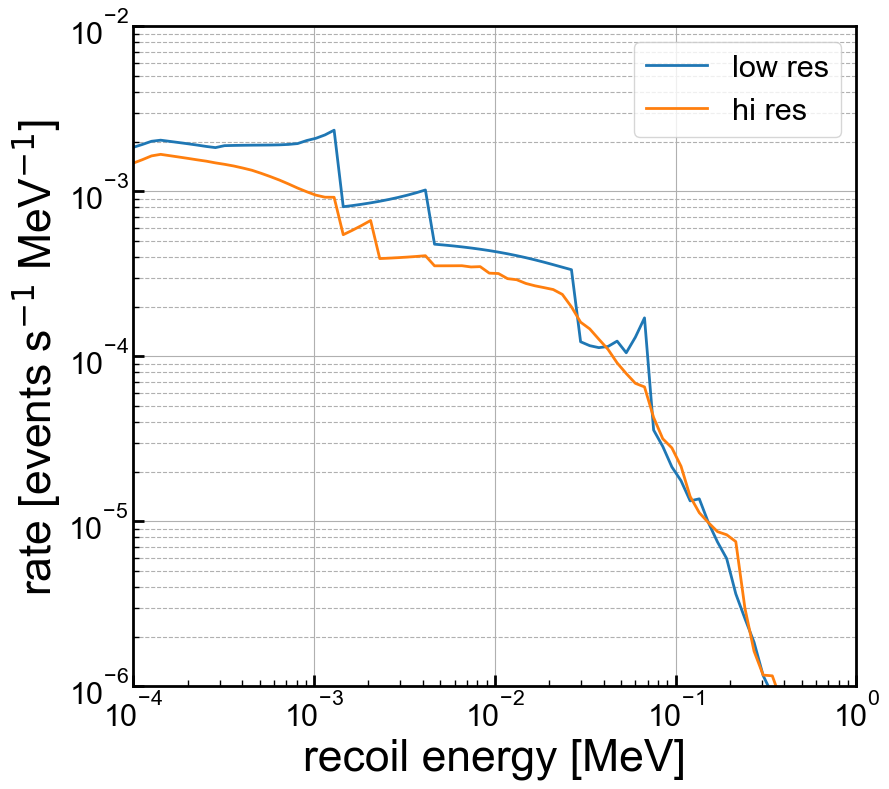

In [14]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


#print(estring)
ax1.plot(Er, dRlow,label='low res')
ax1.plot(Er, dRhigh,label="hi res")



ymin = 1e-6
ymax = 1e-2

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-4, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [MeV]')
ax1.set_ylabel('rate [events s$^{-1}$ MeV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('../1-Paper_Figures/heflux.pdf')
#plt.savefig('../1-Paper_Figures/hist.pdf')
plt.savefig('figures/first_recspec_library.png')
plt.show()

Digging Into Timing
===================

In [15]:
import ENDF6el as el

In [16]:
importlib.reload(el)
import ENDF6el as el

start=time.time()
f=el.fetch_elastic(filename='xn_data/si28_el.txt')
print(f(1.5))
end = time.time()
print('Evaluation Time: {:1.5f} sec.'.format(end-start))

2.526721380497967
Evaluation Time: 0.00943 sec.


In [17]:
start=time.time()
fd=el.fetch_diff_xn(En=1e6,sigtotfile='xn_data/si28_el.txt',endffile='xn_data/n-014_Si_028.endf')
print(fd(0.5))
end = time.time()
print('Evaluation Time: {:1.5f} sec.'.format(end-start))

0.5875860796213399
Evaluation Time: 0.02054 sec.


In [18]:
l = np.arange(0,37)
a = el.al(l,endffile='xn_data/n-014_Si_028.endf')

In [19]:
start=time.time()
fdfast=el.fetch_diff_xn(En=1e6,f=f,a=a,sigtotfile='xn_data/si28_el.txt',endffile='xn_data/n-014_Si_028.endf')
print(fdfast(0.5))
end = time.time()
print('Evaluation Time: {:1.5f} sec.'.format(end-start))

0.5875860796213399
Evaluation Time: 0.00129 sec.


In [20]:
import masses as ms
M=ms.getMass(14,28)
start=time.time()
fder=el.fetch_der_xn(En=1e6,M=M,pts=100,eps=1e-5,f=None,a=None,sigtotfile='xn_data/si28_el.txt',endffile='xn_data/n-014_Si_028.endf')
print(fder([0.05,0.06]))
end = time.time()
print('Evaluation Time: {:1.5f} sec.'.format(end-start))

[37.68965337 29.02311503]
Evaluation Time: 0.02003 sec.


In [21]:
start=time.time()
fder=el.fetch_der_xn(En=1e6,M=M,pts=100,eps=1e-5,f=f,a=a,sigtotfile='xn_data/si28_el.txt',endffile='xn_data/n-014_Si_028.endf')
print(fder([0.05,0.06]))
end = time.time()
print('Evaluation Time: {:1.5f} sec.'.format(end-start))

[37.68965337 29.02311503]
Evaluation Time: 0.00156 sec.


In [22]:
start=time.time()
print(el.calc_der_xn(0.1,En=1,fd=fdfast))
end = time.time()
print('Evaluation Time: {:1.5f} sec.'.format(end-start))

9.333415701148686
Evaluation Time: 0.00010 sec.


In [23]:
importlib.reload(frs)

E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=10e-6)

fast flux: 4000.0000000000005 n/m^2/day
175
6000 6000
LinregressResult(slope=-0.341989060170171, intercept=-12.883178144228603, rvalue=-0.9953352356165475, pvalue=2.847357267291413e-06, stderr=0.014824519476612728, intercept_stderr=0.06273875262265612)
0.00999875556830254 0.01


In [24]:
print(np.shape(E))

(15088,)


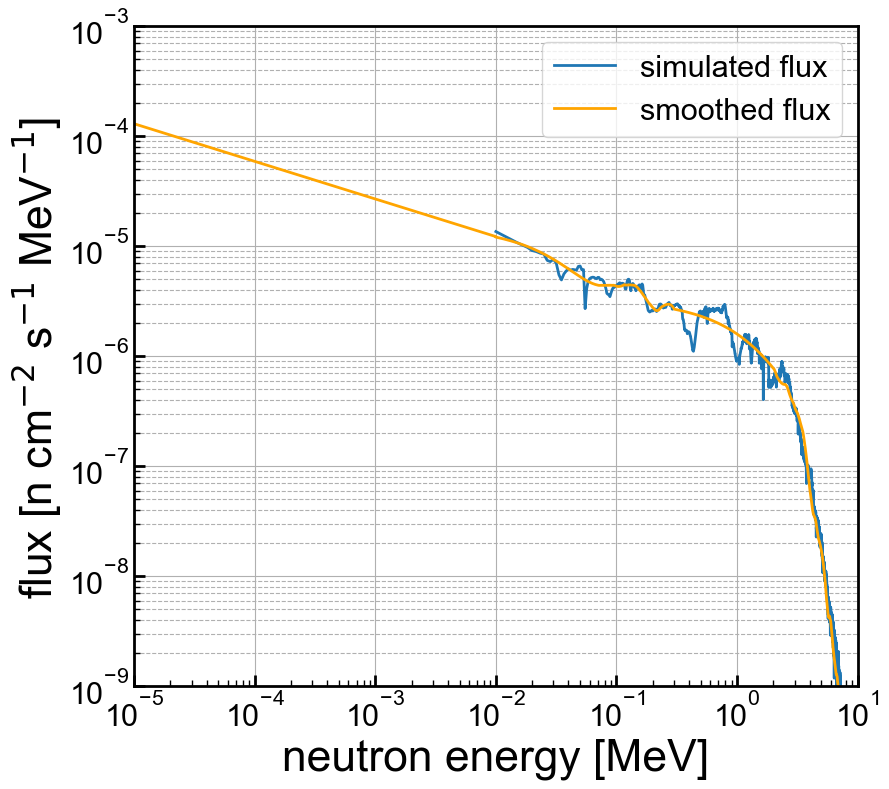

In [25]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


#print(estring)
ax1.plot(ff, ffspec,label='simulated flux')
ax1.plot(E, F,color='orange',label="smoothed flux")



ymin = 1e-9
ymax = 1e-3

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-5, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('flux [n cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/heflux_10eV_library.png')
#plt.savefig('../1-Paper_Figures/hist.pdf')
plt.show()

In [56]:
importlib.reload(frs)
#get Er vector
Er= np.geomspace(100/1e6, 1.0, 100)
print(np.shape(Er))
E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=1e-3)
start = time.time()
drde,dsig=frs.dRdErfast(Er,E,F,N=1)
end = time.time()
print('Evaluation Time: {:1.5f} sec.'.format(end-start))

(100,)
fast flux: 4000.0000000000005 n/m^2/day
175
shape of etot: (6000,)
6000 6000
LinregressResult(slope=-0.341989060170171, intercept=-12.883178144228603, rvalue=-0.9953352356165475, pvalue=2.847357267291413e-06, stderr=0.014824519476612728, intercept_stderr=0.06273875262265612)
0.009998654133395216 0.01
Evaluation Time: 277.47729 sec.


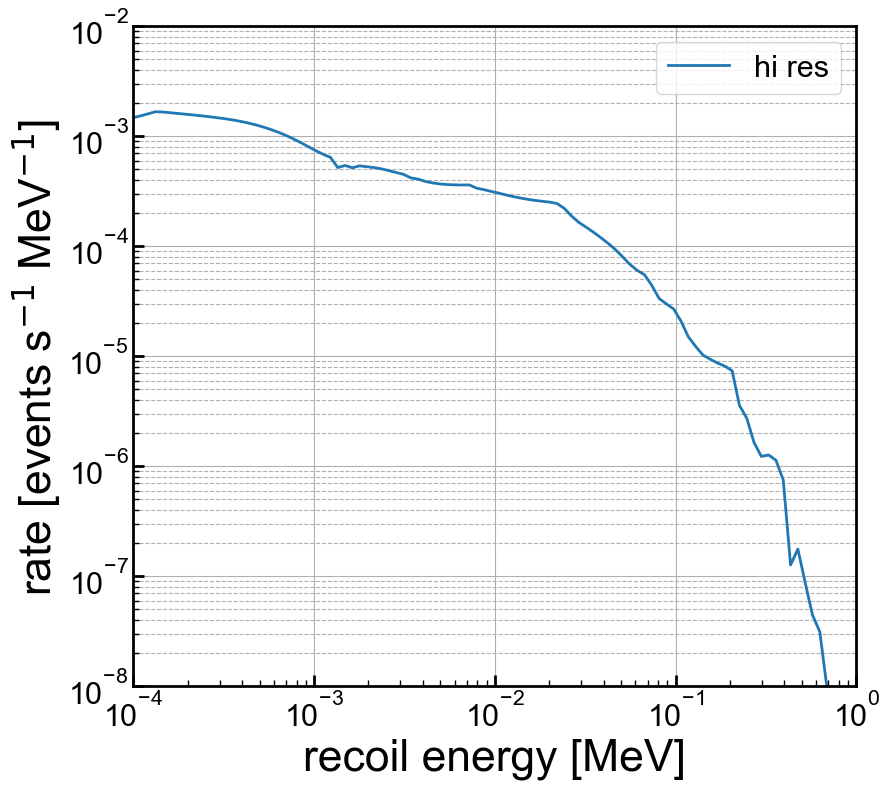

In [57]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


#print(estring)
#ax1.plot(Er, dRlow,label='low res')
ax1.plot(Er, drde,label="hi res")



ymin = 1e-8
ymax = 1e-2

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-4, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [MeV]')
ax1.set_ylabel('rate [events s$^{-1}$ MeV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('../1-Paper_Figures/heflux.pdf')
#plt.savefig('../1-Paper_Figures/hist.pdf')
#plt.savefig('figures/first_recspec_library.png')
plt.show()